In [42]:
install.packages("tree",repos = "http://cran.us.r-project.org")
install.packages("ISLR",repos = "http://cran.us.r-project.org")
install.packages("gbm",repos = "http://cran.us.r-project.org")

Warning message:
"package 'tree' is in use and will not be installed"Warning message:
"package 'ISLR' is in use and will not be installed"Warning message:
"package 'gbm' is in use and will not be installed"

In [43]:
require(ISLR)
require("tree")
require("randomForest")
require(gbm)

In [44]:
head(College)
attach(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


The following objects are masked from College (pos = 4):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc

The following objects are masked from College (pos = 5):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc



# Chapter 8 #12
12. Apply boosting, bagging, and random forests to a data set of your
choice. Be sure to fit the models on a training set and to evaluate their
performance on a test set. How accurate are the results compared
to simple methods like linear or logistic regression? Which of these
approaches yields the best performance?

## train test split

In [45]:
set.seed(1)
nobs = dim(College)[1]
split  = 0.7 ## 70/30 split of datatset
train = sample(1:nobs, split*nobs)
test = -train
traindata = College[train,]
testdata = College[test,]
testoutcomes = Grad.Rate[test]

## Bagging special case of random forest using all predictors


Call:
 randomForest(formula = Grad.Rate ~ ., data = traindata, mtry = 15,      imprtance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 15

          Mean of squared residuals: 157.0952
                    % Var explained: 42.33

,IncNodePurity
Private,161.274
Apps,6991.486
Accept,3266.000
Enroll,6351.778
Top10perc,10224.292
Top25perc,12612.803
F.Undergrad,4922.139
P.Undergrad,5457.072
Outstate,46419.760
Room.Board,5393.883


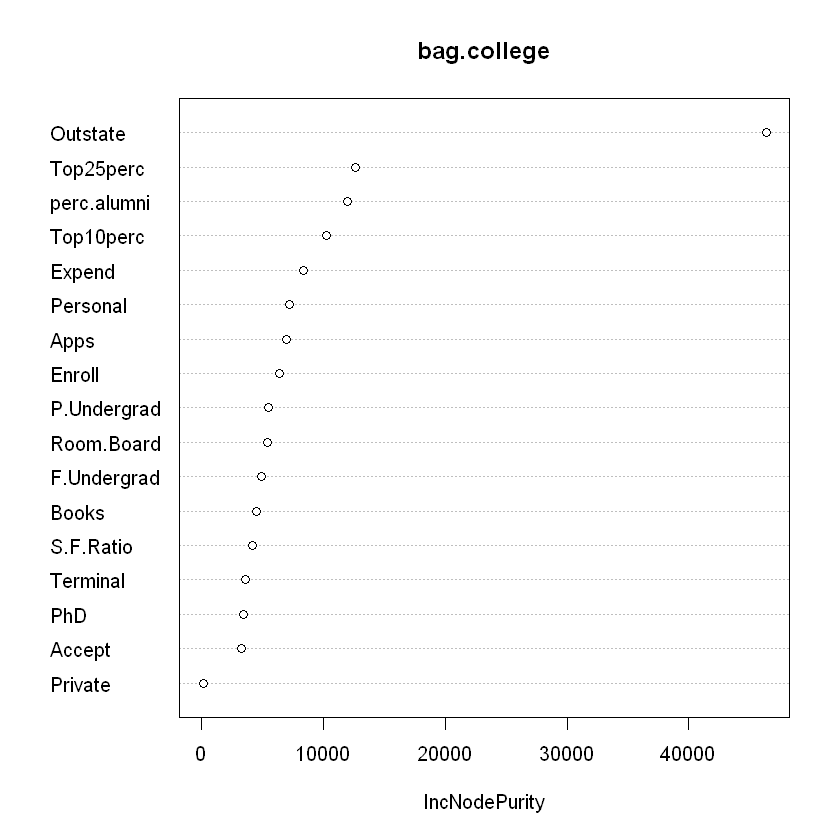

In [46]:
bag.college = randomForest(Grad.Rate~., data = traindata, mtry = 15, imprtance = TRUE)
bag.college
#how important a variable is
importance(bag.college)
varImpPlot(bag.college)

## prediction on test data

[1] 204.746

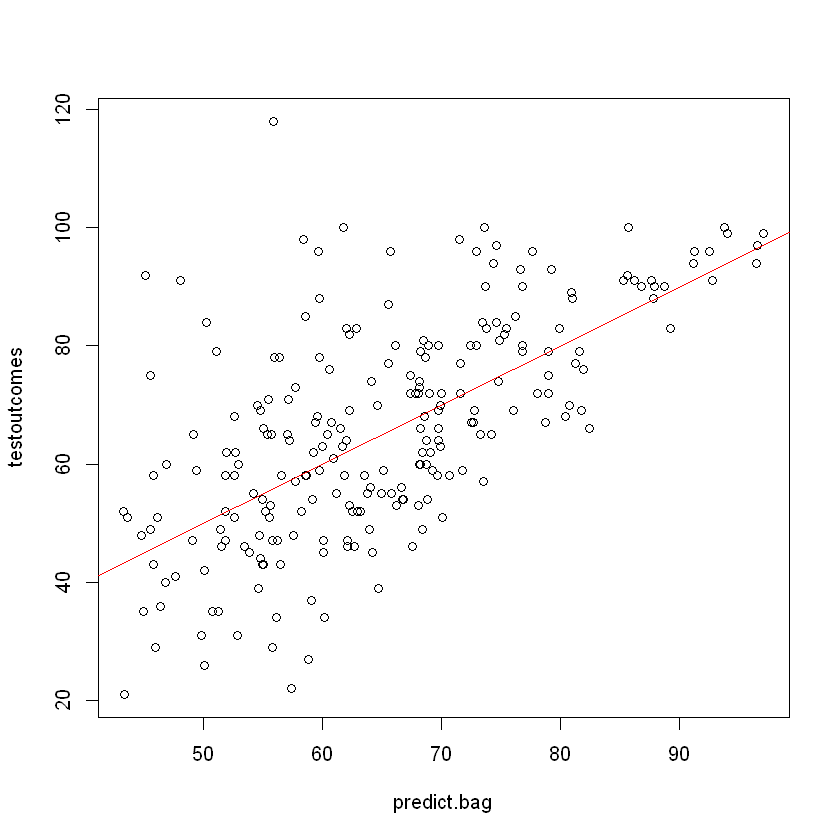

In [47]:
predict.bag = predict(bag.college, newdata = testdata)
mean((predict.bag- testoutcomes)^2)
plot(predict.bag, testoutcomes); abline(0,1,col = "red")

## random forest

[1] -1.091725

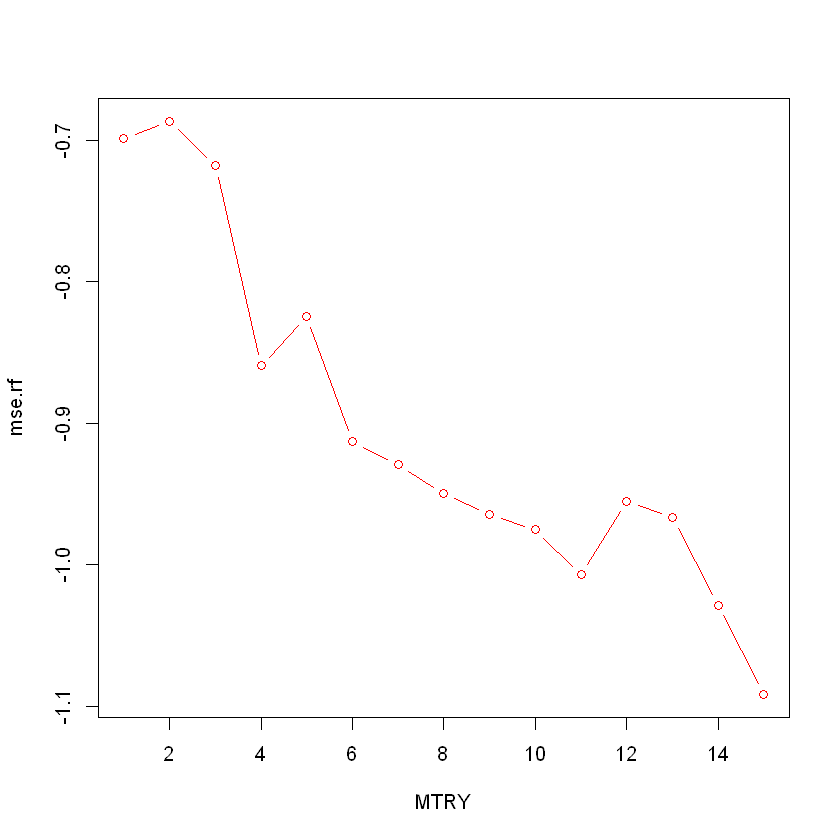

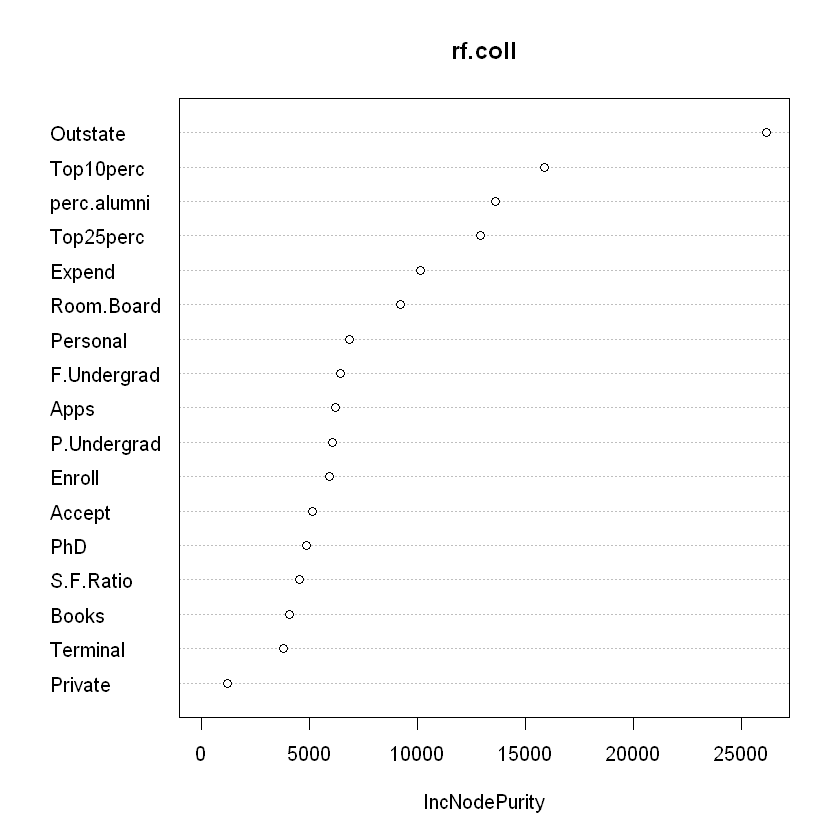

In [48]:
?randomForest
mse.rf = rep(0,15)
for(d in 1:15){
  rf.college = randomForest(Grad.Rate~., data = traindata, mtry = d, imprtance = TRUE)
  predict.rf = predict(rf.college, newdata = testdata)
  mse.rf[d] = mean((predict.rf - testoutcomes))
}
#take min test errror
MTRY = c(1:15)
plot( MTRY, mse.rf, type = "b", col="red")
min(mse.rf)

# we found that mtry = 5 to be the one with the lowest error
rf.coll = randomForest(Grad.Rate~.,data= traindata, mtry = 5, imprtance = TRUE)
varImpPlot(rf.coll)

## boosting
regression analysis set distribution to gaussian.
 categorical variables set distribution to bernoulli

,var,rel.inf
Outstate,Outstate,29.7164834
perc.alumni,perc.alumni,10.1556004
Top25perc,Top25perc,9.5900014
Top10perc,Top10perc,8.4411933
Enroll,Enroll,5.1416716
Room.Board,Room.Board,5.1323857
F.Undergrad,F.Undergrad,4.5581699
P.Undergrad,P.Undergrad,4.3698346
Apps,Apps,4.3482133
Personal,Personal,4.1385173


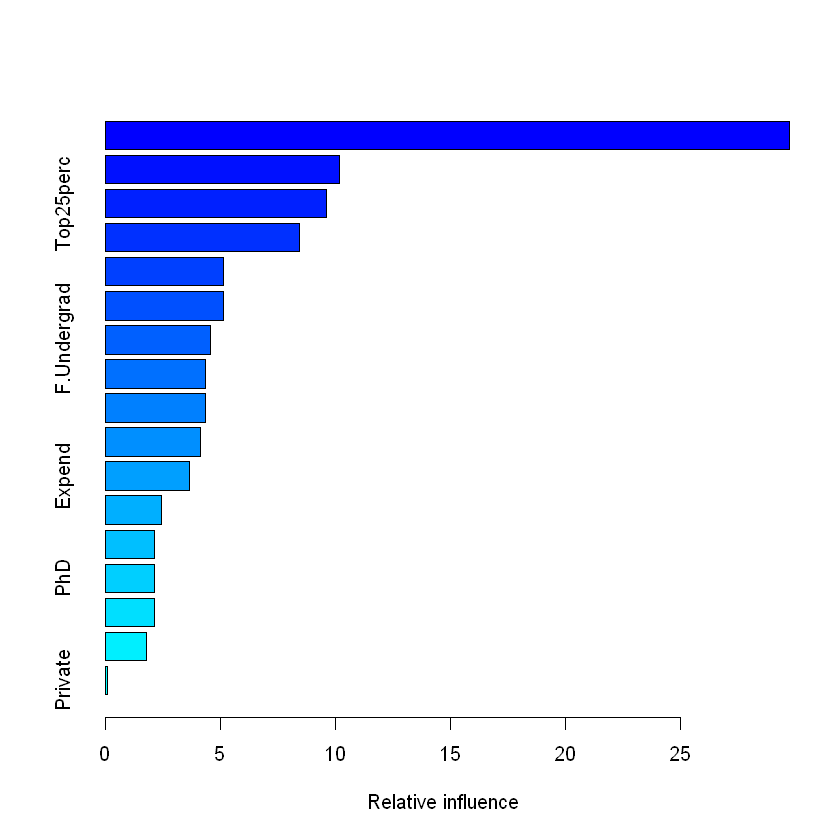

In [49]:
boost = gbm(Grad.Rate~., data = traindata, distribution = "gaussian", n.trees = 5000, interaction.depth = 4, shrinkage = 0.001)
summary(boost)

[1] 191.162

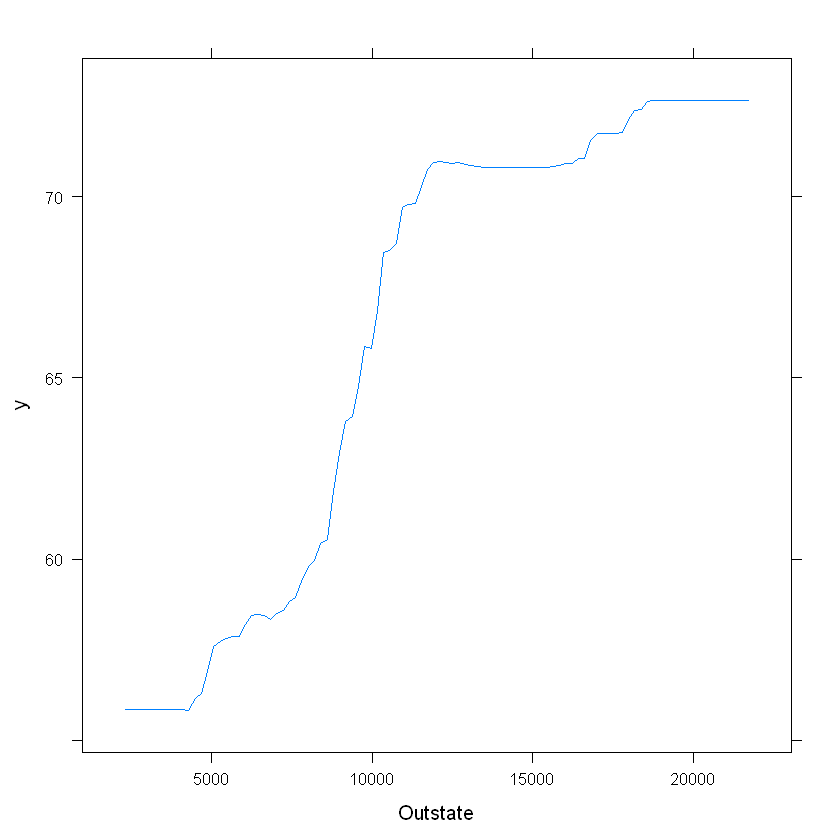

In [50]:
plot(boost, i = "Outstate")
predict.boost = predict(boost, newdata = testdata, n.trees = 5000)
mean((predict.boost - testoutcomes)^2) ## with boosting we reduced the test error

## tuning lambda

[1] 191.5631

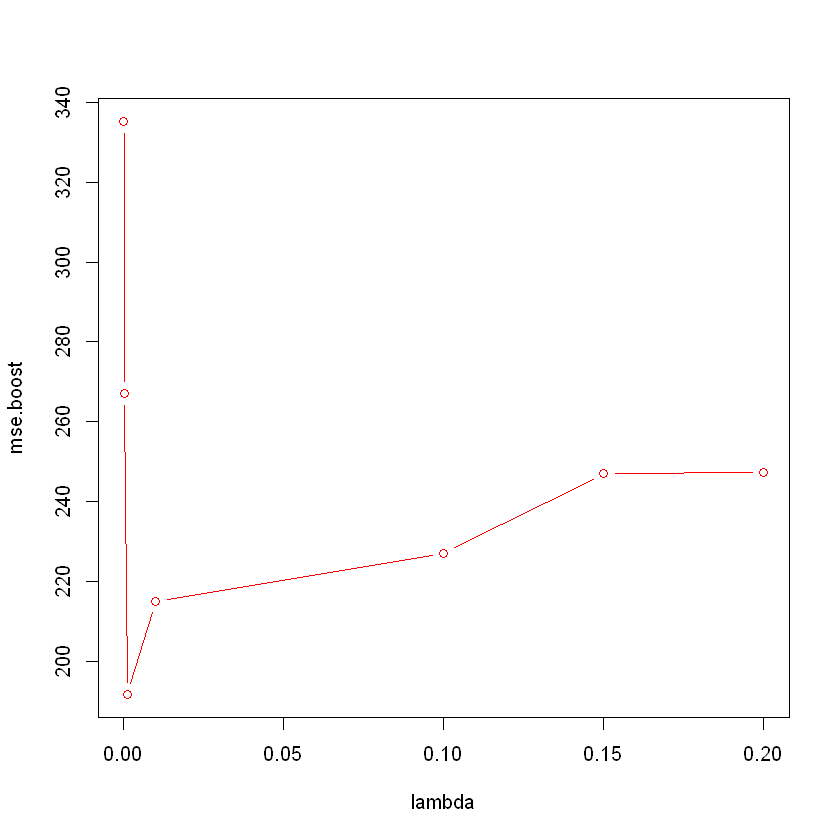

In [51]:
lambda = c(.00001,.0001,.001,.01,.1,.15,.2)
counter = 1
mse.boost = rep(0,7)
for (d in lambda) {
  boost = gbm(Grad.Rate~., data = traindata, distribution = "gaussian", n.trees = 5000, interaction.depth = 4, shrinkage = d)
  predict.boost = predict(boost, newdata = testdata, n.trees = 5000)
  mse.boost[counter]= mean((predict.boost- testoutcomes)^2)
  counter= counter+1
}


plot(lambda, mse.boost, type= "b", col = "red")
min(mse.boost)

# adjusting lambda has reduced mse further

## tuning tree size

[1] 191.7749

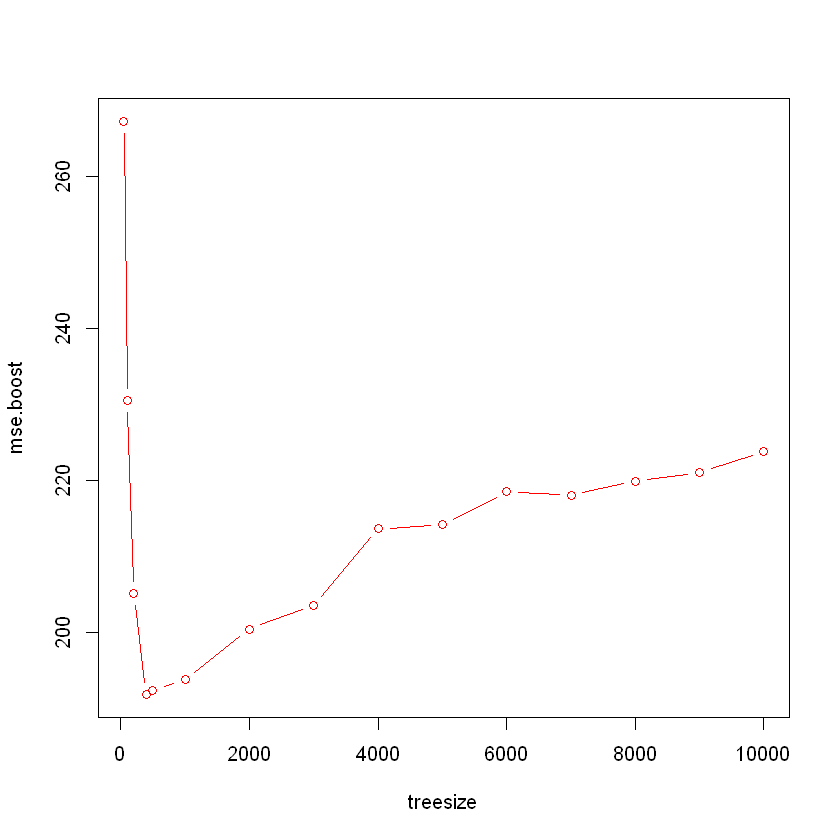

In [52]:
treesize = c(50,100,200,400,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000)
counter = 1
mse.boost = rep(0,15)
for (d in treesize) {
  boost = gbm(Grad.Rate~., data = traindata, distribution = "gaussian", n.trees = d, interaction.depth = 4, shrinkage =0.01)
  predict.boost = predict(boost, newdata = testdata, n.trees = d)
  mse.boost[counter]= mean((predict.boost- testoutcomes)^2)
  counter= counter+1
}


plot(treesize, mse.boost, type= "b", col = "red")
min(mse.boost)

## linear regression approach

In [53]:
lm.fit = lm(Grad.Rate~., traindata)
summary(lm.fit)


Call:
lm(formula = Grad.Rate ~ ., data = traindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.447  -6.505  -0.261   6.622  50.917 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.3536443  5.7343876   5.642 2.75e-08 ***
PrivateYes   2.5450215  1.9701603   1.292 0.197000    
Apps         0.0009927  0.0005041   1.969 0.049438 *  
Accept      -0.0005627  0.0009738  -0.578 0.563637    
Enroll       0.0008930  0.0024924   0.358 0.720276    
Top10perc    0.1464341  0.0838843   1.746 0.081454 .  
Top25perc    0.1038193  0.0638749   1.625 0.104687    
F.Undergrad -0.0002165  0.0004528  -0.478 0.632678    
P.Undergrad -0.0015949  0.0005947  -2.682 0.007555 ** 
Outstate     0.0010342  0.0002687   3.849 0.000133 ***
Room.Board   0.0019590  0.0006863   2.854 0.004484 ** 
Books       -0.0004690  0.0037203  -0.126 0.899727    
Personal    -0.0012161  0.0009156  -1.328 0.184695    
PhD          0.0843978  0.0701055   1.204 0.229183    
Terminal    -

## optimized to most significant predictors

In [54]:
lm.fit1 = lm(Grad.Rate~Private+Apps+Top25perc+P.Undergrad+Outstate+Room.Board+Personal+perc.alumni+Expend, traindata)
summary(lm.fit1)


Call:
lm(formula = Grad.Rate ~ Private + Apps + Top25perc + P.Undergrad + 
    Outstate + Room.Board + Personal + perc.alumni + Expend, 
    data = traindata)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.171  -6.496   0.003   7.050  51.071 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.6530560  3.0033771  10.539  < 2e-16 ***
PrivateYes   2.3611879  1.7781956   1.328 0.184794    
Apps         0.0007028  0.0001765   3.981 7.82e-05 ***
Top25perc    0.2095604  0.0349557   5.995 3.75e-09 ***
P.Undergrad -0.0018239  0.0005437  -3.355 0.000851 ***
Outstate     0.0010138  0.0002538   3.995 7.38e-05 ***
Room.Board   0.0020088  0.0006650   3.020 0.002645 ** 
Personal    -0.0013236  0.0008756  -1.512 0.131228    
perc.alumni  0.2505022  0.0572773   4.373 1.47e-05 ***
Expend      -0.0003940  0.0001509  -2.612 0.009265 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.38 on 533 degrees of freedom
M

In [55]:
lm.pred = predict(lm.fit1, newdata = testdata)
mean((lm.pred - testoutcomes)^2)

[1] 186.2898

The mse is 182.94 the lowest out of all other models. This shows that the best model to predict the graduation rate of a school would a linear regression model optimised for the most significant predictors. 

# chapter 9 #4 
4. Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

In [57]:
install.packages("e1071", repos = "https://cran.r-project.org/")
require(e1071)

Warning message:
"package 'e1071' is in use and will not be installed"

## Creating Data frame with a random 100 obs. with non linear predictors

In [58]:
set.seed(1)
x = matrix(rnorm(200), ncol =2)
x[1:40, ] = x[1:40, ] + 2
x[41:75, ] = x[41:75, ] - 2
y = c(rep(1,75), rep(2,25))
df= data.frame(x = x, y = as.factor(y))

## Train Test Split w/ a radial based model plot on the data

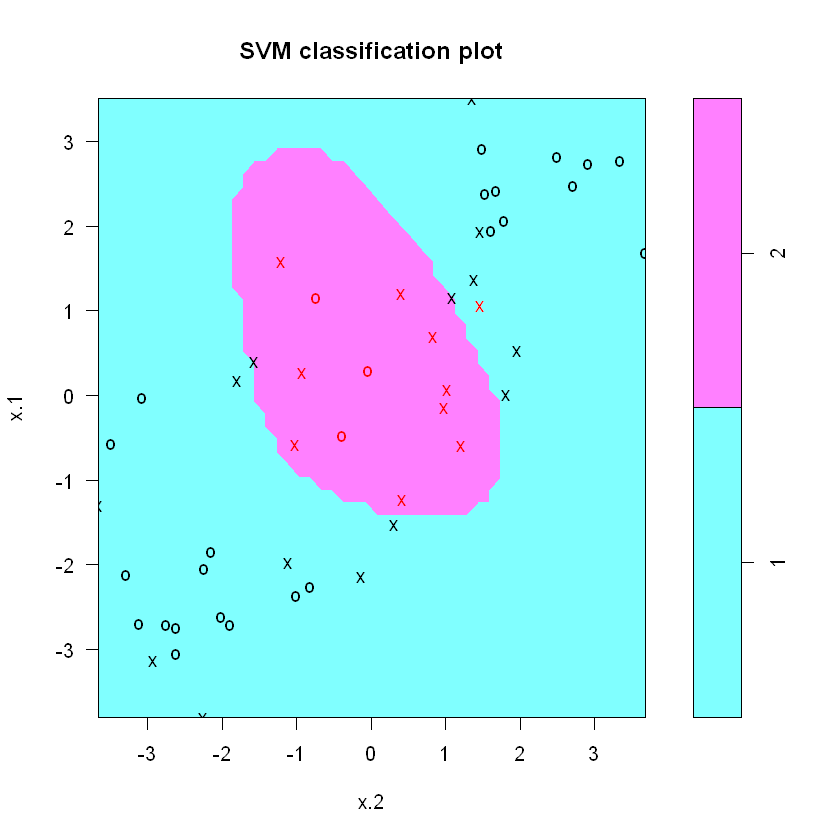

In [62]:
train = sample(100, 50)
test = -train
svmfit = svm(y~.,data = df[train,], kernel = 'radial', gamma = 1, cost =1)
plot(svmfit, df[train,])

## tune model and use best radial model for prediction

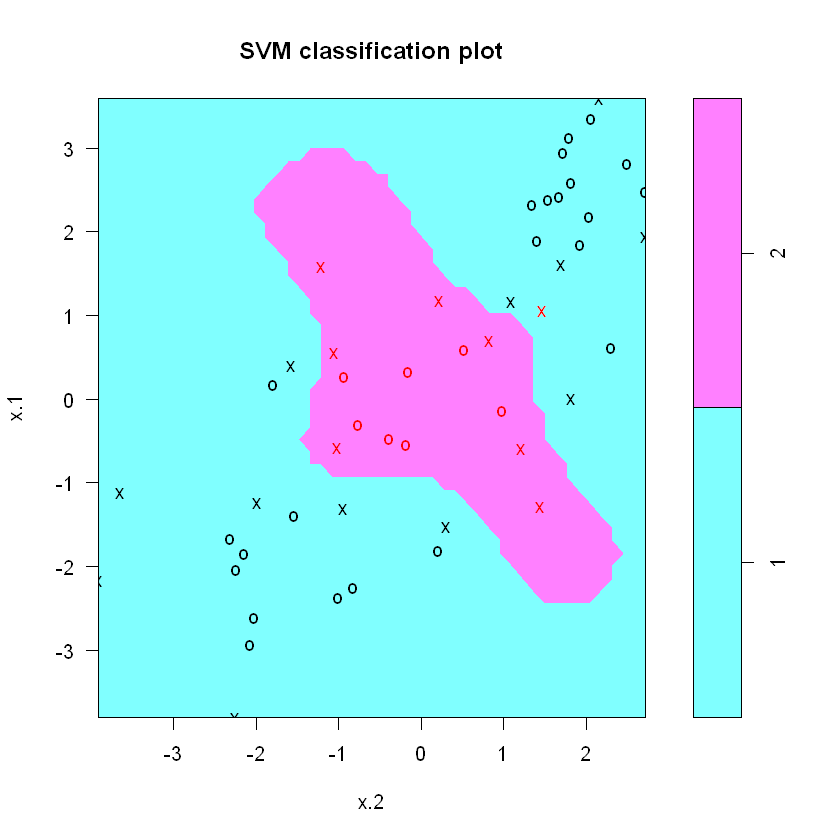

In [60]:
tune.mod = tune(svm, y~.,data = df[train,], kernel = 'radial',
                ranges = list(cost = c(0.1,1,10,100,1000),
                              gamma = c(0.5,1,2,3,4)))

best.mod = tune.mod$best.model
plot(best.mod, df[train,])

## train/ test tables for radial model

In [67]:
print("Train table")
table(true = df[train,"y"],pred= predict(best.mod, news= df[train, ]))
(28+5)/(8+9+28+5)
print("Test table")
table(true = df[test,"y"],pred= predict(best.mod, news= df[test, ]))
(26+2)/(10+12+26+2)

[1] "Train table"


    pred
true  1  2
   1 28  9
   2  8  5

[1] 0.66

[1] "Test table"


    pred
true  1  2
   1 26 12
   2 10  2

[1] 0.56

## linear fit for data

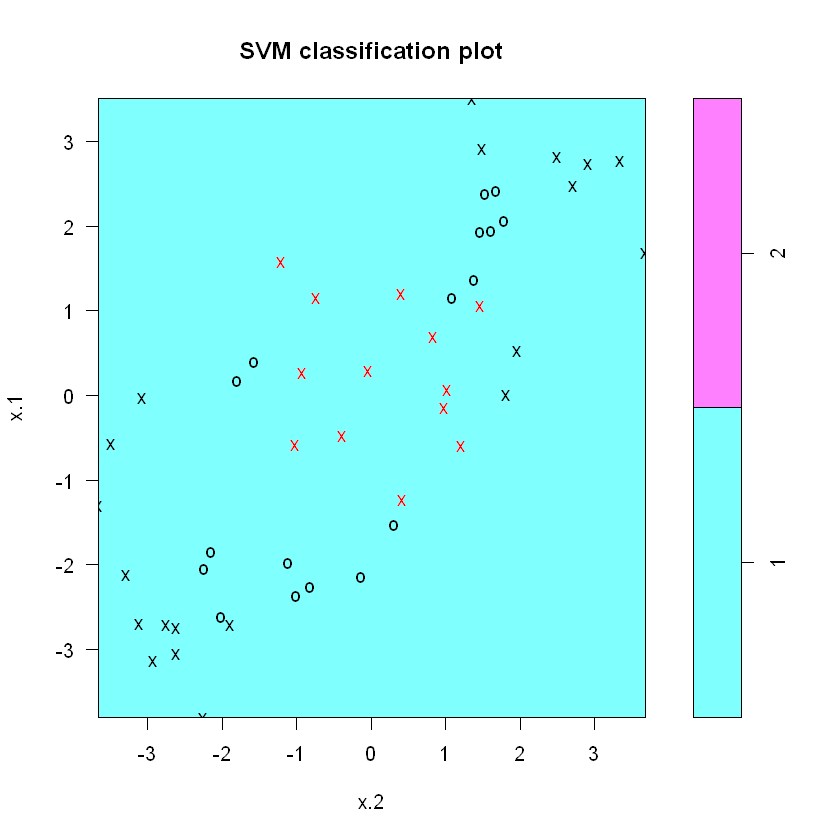

In [64]:
svm.linear.fit = svm(y~.,data= df[train,], kernel ="linear", cost = 10, scale = FALSE)
plot(svm.linear.fit, df[train,])

## tune linear model

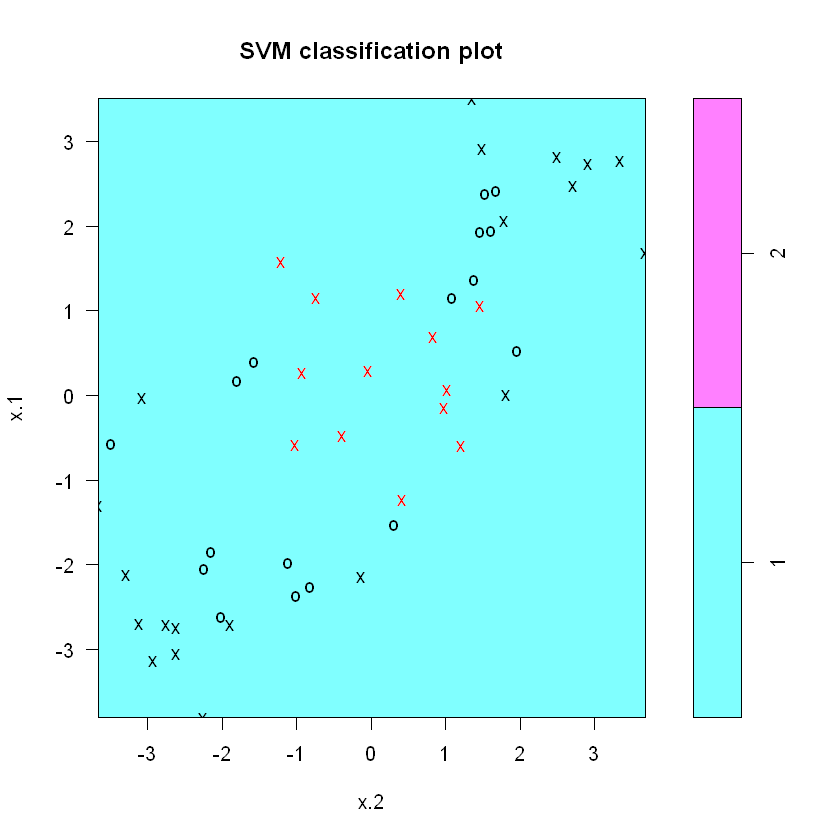

In [65]:
tune.out = tune(svm, y~.,data = df[train,], kernel = "linear", ranges = list(c(0.001,0.01,0.1,1,5,10,100)))
best.linear.model = tune.out$best.model
plot(best.linear.model, df[train,])

## train/ test tables for linear model

In [66]:
print("Train table")
table(true = df[train,"y"],pred= predict(best.linear.model, news= df[train, ]))
print("Test table")
table(true = df[test,"y"],pred= predict(best.linear.model, news= df[test, ]))

[1] "Train table"


    pred
true  1  2
   1 37  0
   2 13  0

[1] "Test table"


    pred
true  1  2
   1 38  0
   2 12  0

the best approach for this non linear data is to use the radial approach because the linear method predicts that all data points are 1 whereas the radial method classifies it correctly 56% of the time.